In [26]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 10.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [35]:
import yfinance as yf

brk = yf.Ticker('TSLA')

hist = brk.history(period="max", auto_adjust=True)

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...
2022-02-04,897.219971,936.500000,881.169983,923.320007,24472600,0,0.0
2022-02-07,923.789978,947.770020,902.710022,907.340027,20331500,0,0.0
2022-02-08,905.530029,926.289978,894.799988,922.000000,16909700,0,0.0


In [37]:
import pandas as pd

df = pd.DataFrame()

df['date'] = hist.index
df['y'] = hist['Close'].values

df.tail()

,date,y
2922,2022-02-04,923.320007
2923,2022-02-07,907.340027
2924,2022-02-08,922.000000
2925,2022-02-09,932.000000
2926,2022-02-10,904.549988


In [29]:
from fbprophet import Prophet

m = Prophet(daily_seasonality=False)

m.fit(df)

In [30]:
future = m.make_future_dataframe(365, freq='D')

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
10738,2023-02-04,131.436025,119.526297,144.565958
10739,2023-02-05,131.435284,119.771871,144.745846
10740,2023-02-06,131.456310,118.824678,144.142692
10741,2023-02-07,131.465680,118.477604,144.511005
10742,2023-02-08,131.445834,118.943137,143.733072
10743,2023-02-09,131.389919,119.831916,143.411106
10744,2023-02-10,131.258687,118.891666,143.855446


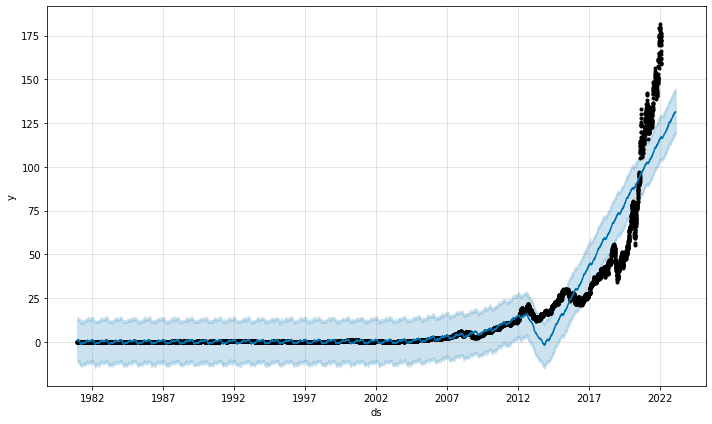

In [31]:
m.plot(forecast);

In [32]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-09-27,6.912919,0.839947,10.866594,6.912919,6.912919,-0.879511,-0.879511,-0.879511,-0.126473,-0.126473,-0.126473,-0.753038,-0.753038,-0.753038,0.0,0.0,0.0,6.033408
1,2004-09-28,6.926073,1.370456,11.386254,6.926073,6.926073,-0.879111,-0.879111,-0.879111,-0.146566,-0.146566,-0.146566,-0.732545,-0.732545,-0.732545,0.0,0.0,0.0,6.046963
2,2004-09-29,6.939228,1.162758,10.948238,6.939228,6.939228,-0.824353,-0.824353,-0.824353,-0.118219,-0.118219,-0.118219,-0.706134,-0.706134,-0.706134,0.0,0.0,0.0,6.114875
3,2004-09-30,6.952382,1.371774,11.156064,6.952382,6.952382,-0.789101,-0.789101,-0.789101,-0.115379,-0.115379,-0.115379,-0.673722,-0.673722,-0.673722,0.0,0.0,0.0,6.163281
4,2004-10-01,6.965537,1.043321,11.581951,6.965537,6.965537,-0.761081,-0.761081,-0.761081,-0.125714,-0.125714,-0.125714,-0.635367,-0.635367,-0.635367,0.0,0.0,0.0,6.204455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4551,2022-08-05,22.623385,15.915895,26.914698,21.346340,24.214003,-1.559106,-1.559106,-1.559106,-0.125714,-0.125714,-0.125714,-1.433392,-1.433392,-1.433392,0.0,0.0,0.0,21.064279
4552,2022-08-06,22.631373,16.136220,27.322929,21.343623,24.238913,-1.145914,-1.145914,-1.145914,0.316175,0.316175,0.316175,-1.462089,-1.462089,-1.462089,0.0,0.0,0.0,21.485458
4553,2022-08-07,22.639360,16.188986,27.112518,21.341707,24.245702,-1.175710,-1.175710,-1.175710,0.316175,0.316175,0.316175,-1.491885,-1.491885,-1.491885,0.0,0.0,0.0,21.463650
4554,2022-08-08,22.647348,15.637903,26.921997,21.340785,24.251780,-1.648667,-1.648667,-1.648667,-0.126473,-0.126473,-0.126473,-1.522194,-1.522194,-1.522194,0.0,0.0,0.0,20.998681


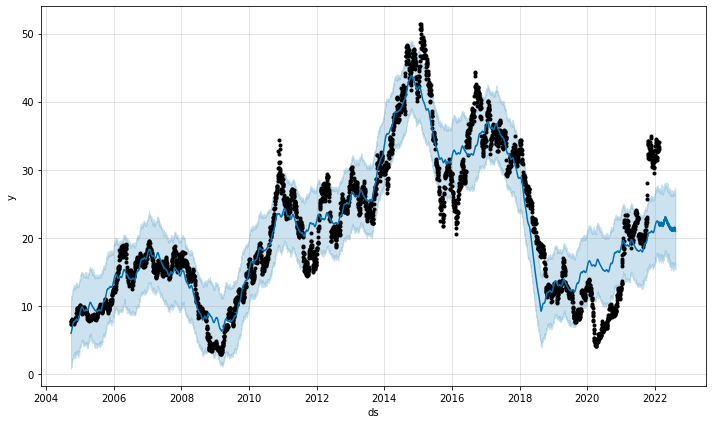

In [38]:
make_forecast('TTM', 180)